<a href="https://colab.research.google.com/github/Blockchain-Framework/bitcoin-anomaly-analysis/blob/develop/Notebooks/cnn/dil_2d_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import sklearn
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import models, datasets, layers, Sequential
from tensorflow.keras.layers import Conv2D, Input, Dropout, Activation, Dense, MaxPooling2D, Flatten, AveragePooling2D, LayerNormalization

### Splitting Data


In [3]:

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
# X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

In [ ]:
# y_train.head()

In [4]:
train = pd.read_csv('/content/drive/MyDrive/bitcoin_imbalance_train_set.csv')
test = pd.read_csv("/content/drive/MyDrive/bitcoin_imbalance_test.csv")

In [5]:
original_feature_names = ['input_transaction_count', 'output_transaction_count',
       'input_value_mean', 'input_value_median', 'input_value_maximum',
       'input_value_minimum', 'input_value_25th_percentile',
       'input_value_75th_percentile', 'input_value_range',
       'input_spending_value_usd_mean', 'input_spending_value_usd_median',
       'input_spending_value_usd_maximum', 'input_spending_value_usd_minimum',
       'input_spending_value_usd_25th_percentile',
       'input_spending_value_usd_75th_percentile',
       'input_spending_value_usd_range', 'input_time_diff_mean',
       'input_time_diff_median', 'input_time_diff_maximum',
       'input_time_diff_minimum', 'input_time_diff_25th_percentile',
       'input_time_diff_75th_percentile', 'input_time_diff_range',
       'output_value_usd_mean', 'output_value_usd_median',
       'output_value_usd_maximum', 'output_value_usd_minimum',
       'output_value_usd_25th_percentile', 'output_value_usd_75th_percentile',
       'output_value_usd_range', 'output_time_diff_mean',
       'output_time_diff_median', 'output_time_diff_maximum',
       'output_time_diff_minimum', 'output_time_diff_25th_percentile',
       'output_time_diff_75th_percentile', 'output_time_diff_range',
       'output_value_mean', 'output_value_median', 'output_value_maximum',
       'output_value_minimum', 'output_value_25th_percentile',
       'output_value_75th_percentile', 'output_value_range',
       'input_output_mean_ratio', 'input_output_max_ratio',
       'input_output_min_ratio', 'input_output_percentile_25_diff',
       'input_output_percentile_75_diff', 'range_mean_ratio_input',
       'range_mean_ratio_output', 'input_output_usd_mean_ratio',
       'input_output_usd_max_ratio', 'input_output_usd_min_ratio',
       'input_output_usd_percentile_25_diff',
       'input_output_usd_percentile_75_diff', 'input_range_mean_ratio',
       'output_range_mean_ratio', 'input_output_transaction_count_ratio',
       'input_output_maximum_transaction_value_diff',
       'input_output_minimum_transaction_value_diff',
       'input_output_time_diff_max_min_diff']

In [6]:
# Split train dataset
X_train = train[original_feature_names]  # Drop the 'label' column for features
y_train = train['label']  # Select the 'label' column for the target variable

# Split test dataset
X_test = test[original_feature_names]  # Drop the 'label' column for features
y_test = test['label']  # Select the 'label' column for the target variable

In [7]:
y_train_bin = y_train.apply(lambda x: 1 if x > 0 else 0)
y_test_bin = y_test.apply(lambda x: 1 if x > 0 else 0)

In [8]:
X_tr_bin, X_v_bin, y_tr_bin, y_v_bin = train_test_split(X_train, y_train_bin, test_size=0.1, random_state=42, stratify=y_train_bin)

In [9]:
X_tr, X_v, y_tr, y_v = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

### Feature Selection From RF Model

In [10]:
selected_0123 = ['input_spending_value_usd_75th_percentile', 'output_value_usd_median', 'output_value_usd_25th_percentile', 'output_value_usd_minimum', 'input_spending_value_usd_25th_percentile', 'output_value_usd_75th_percentile', 'output_value_usd_maximum', 'input_spending_value_usd_median', 'input_spending_value_usd_minimum', 'output_value_minimum', 'input_spending_value_usd_maximum', 'output_value_usd_mean', 'output_value_25th_percentile', 'input_output_usd_mean_ratio', 'input_value_minimum', 'input_spending_value_usd_mean', 'output_value_75th_percentile', 'input_value_75th_percentile', 'input_output_usd_max_ratio', 'input_output_usd_min_ratio', 'input_value_mean', 'input_value_maximum', 'input_value_median', 'output_value_mean', 'output_value_median', 'output_value_maximum', 'input_value_25th_percentile', 'input_output_usd_percentile_75_diff', 'input_output_usd_percentile_25_diff', 'input_time_diff_median', 'output_time_diff_maximum', 'input_time_diff_25th_percentile', 'input_time_diff_mean', 'input_time_diff_maximum', 'output_time_diff_mean', 'input_time_diff_75th_percentile', 'output_time_diff_75th_percentile', 'input_output_time_diff_max_min_diff', 'output_time_diff_range', 'input_time_diff_range', 'output_value_usd_range', 'output_time_diff_median', 'output_time_diff_25th_percentile', 'input_transaction_count', 'range_mean_ratio_output', 'input_range_mean_ratio', 'output_range_mean_ratio', 'input_spending_value_usd_range', 'output_transaction_count', 'input_value_range', 'range_mean_ratio_input', 'output_value_range', 'input_output_transaction_count_ratio', 'input_output_mean_ratio', 'input_output_percentile_25_diff', 'input_output_percentile_75_diff', 'input_output_minimum_transaction_value_diff', 'input_output_min_ratio', 'input_output_maximum_transaction_value_diff', 'input_output_max_ratio']

selected_123 = ['input_time_diff_75th_percentile', 'output_value_usd_maximum', 'input_value_maximum', 'output_time_diff_range', 'output_value_usd_minimum', 'output_time_diff_mean', 'output_value_usd_75th_percentile', 'output_value_usd_mean', 'input_spending_value_usd_minimum', 'input_spending_value_usd_maximum', 'output_value_usd_median', 'input_spending_value_usd_mean', 'output_value_mean', 'input_spending_value_usd_75th_percentile', 'output_value_maximum', 'input_value_mean', 'output_value_minimum', 'input_value_minimum', 'output_value_75th_percentile', 'output_value_median', 'input_value_median', 'input_time_diff_median', 'input_value_75th_percentile', 'input_spending_value_usd_median', 'output_value_usd_25th_percentile', 'output_value_25th_percentile', 'input_value_25th_percentile', 'input_spending_value_usd_25th_percentile', 'output_time_diff_maximum', 'output_time_diff_75th_percentile', 'input_transaction_count', 'input_output_usd_mean_ratio', 'input_output_usd_max_ratio', 'input_output_usd_percentile_75_diff', 'input_output_usd_min_ratio', 'input_output_usd_percentile_25_diff', 'output_range_mean_ratio', 'output_value_usd_range', 'input_time_diff_25th_percentile', 'input_time_diff_mean', 'output_value_range', 'input_range_mean_ratio', 'output_time_diff_median', 'output_transaction_count', 'input_value_range', 'input_spending_value_usd_range', 'range_mean_ratio_output', 'input_output_time_diff_max_min_diff', 'input_time_diff_maximum', 'input_time_diff_range', 'output_time_diff_25th_percentile', 'range_mean_ratio_input', 'input_output_transaction_count_ratio', 'input_output_mean_ratio', 'input_output_percentile_75_diff', 'input_output_percentile_25_diff', 'input_output_min_ratio', 'input_output_minimum_transaction_value_diff', 'input_output_maximum_transaction_value_diff', 'input_output_max_ratio']

selected_01 = ['input_spending_value_usd_75th_percentile', 'input_time_diff_75th_percentile', 'input_time_diff_mean', 'input_spending_value_usd_maximum', 'input_value_minimum', 'input_time_diff_25th_percentile', 'output_value_usd_maximum', 'input_time_diff_median', 'input_value_maximum', 'output_value_usd_minimum', 'input_spending_value_usd_minimum', 'output_value_usd_mean', 'output_value_maximum', 'output_value_minimum', 'output_value_usd_median', 'output_value_usd_75th_percentile', 'output_value_75th_percentile', 'input_spending_value_usd_mean', 'input_value_75th_percentile', 'input_spending_value_usd_median', 'input_time_diff_maximum', 'output_time_diff_mean', 'input_output_usd_min_ratio', 'output_value_usd_25th_percentile', 'input_output_usd_mean_ratio', 'input_spending_value_usd_25th_percentile', 'input_value_mean', 'input_output_usd_max_ratio', 'output_value_25th_percentile', 'input_time_diff_range', 'output_value_mean', 'input_output_usd_percentile_25_diff', 'input_value_25th_percentile', 'input_value_median', 'output_value_median', 'input_output_usd_percentile_75_diff', 'output_time_diff_75th_percentile', 'input_transaction_count', 'output_time_diff_maximum', 'output_value_usd_range', 'input_output_time_diff_max_min_diff', 'output_time_diff_range', 'range_mean_ratio_output', 'output_time_diff_median', 'output_time_diff_25th_percentile', 'output_value_range', 'input_spending_value_usd_range', 'range_mean_ratio_input', 'input_range_mean_ratio', 'input_value_range', 'output_range_mean_ratio', 'output_transaction_count', 'input_output_transaction_count_ratio', 'input_output_mean_ratio', 'input_output_percentile_25_diff', 'input_output_percentile_75_diff', 'input_output_min_ratio', 'input_output_minimum_transaction_value_diff', 'input_output_maximum_transaction_value_diff', 'input_output_max_ratio']

selected_02 = ['output_value_usd_mean', 'output_value_usd_75th_percentile', 'output_value_usd_maximum', 'input_spending_value_usd_mean', 'input_spending_value_usd_25th_percentile', 'input_spending_value_usd_maximum', 'output_value_usd_25th_percentile', 'input_spending_value_usd_75th_percentile', 'output_value_usd_minimum', 'input_spending_value_usd_median', 'input_output_usd_min_ratio', 'output_value_usd_median', 'input_output_usd_mean_ratio', 'input_spending_value_usd_minimum', 'output_value_minimum', 'input_output_usd_max_ratio', 'output_value_mean', 'output_value_25th_percentile', 'output_value_maximum', 'input_value_median', 'input_value_maximum', 'input_value_75th_percentile', 'input_value_mean', 'output_value_median', 'input_value_25th_percentile', 'input_value_minimum', 'input_output_usd_percentile_75_diff', 'output_value_75th_percentile', 'input_output_usd_percentile_25_diff', 'output_time_diff_mean', 'output_time_diff_maximum', 'output_time_diff_75th_percentile', 'output_range_mean_ratio', 'output_time_diff_range', 'input_time_diff_mean', 'input_transaction_count', 'input_time_diff_range', 'output_value_usd_range', 'input_time_diff_maximum', 'output_time_diff_median', 'input_time_diff_75th_percentile', 'input_range_mean_ratio', 'input_spending_value_usd_range', 'range_mean_ratio_input', 'output_time_diff_25th_percentile', 'output_transaction_count', 'input_time_diff_median', 'input_output_time_diff_max_min_diff', 'range_mean_ratio_output', 'input_value_range', 'input_output_transaction_count_ratio', 'input_time_diff_25th_percentile', 'output_value_range', 'input_output_percentile_25_diff', 'input_output_percentile_75_diff', 'input_output_mean_ratio', 'input_output_minimum_transaction_value_diff', 'input_output_min_ratio', 'input_output_maximum_transaction_value_diff', 'input_output_max_ratio']

selected_03 = ['output_value_usd_minimum', 'output_value_25th_percentile', 'output_value_minimum', 'output_value_usd_25th_percentile', 'input_output_usd_mean_ratio', 'input_output_usd_percentile_75_diff', 'input_output_usd_max_ratio', 'output_value_usd_median', 'input_value_25th_percentile', 'input_value_median', 'input_spending_value_usd_minimum', 'input_spending_value_usd_25th_percentile', 'input_output_usd_min_ratio', 'input_output_usd_percentile_25_diff', 'output_value_median', 'input_value_minimum', 'input_spending_value_usd_75th_percentile', 'input_value_75th_percentile', 'input_spending_value_usd_median', 'output_value_75th_percentile', 'input_value_maximum', 'output_value_usd_mean', 'input_spending_value_usd_mean', 'output_value_usd_75th_percentile', 'input_value_mean', 'output_value_mean', 'input_spending_value_usd_maximum', 'output_value_usd_maximum', 'output_value_maximum', 'input_time_diff_median', 'input_output_time_diff_max_min_diff', 'input_time_diff_25th_percentile', 'input_time_diff_maximum', 'input_time_diff_range', 'output_time_diff_median', 'output_time_diff_range', 'output_time_diff_maximum', 'output_time_diff_25th_percentile', 'output_time_diff_75th_percentile', 'input_time_diff_mean', 'input_time_diff_75th_percentile', 'output_time_diff_mean', 'output_transaction_count', 'input_transaction_count', 'output_range_mean_ratio', 'output_value_range', 'range_mean_ratio_output', 'output_value_usd_range', 'input_range_mean_ratio', 'input_output_transaction_count_ratio', 'input_spending_value_usd_range', 'input_value_range', 'range_mean_ratio_input', 'input_output_percentile_75_diff', 'input_output_mean_ratio', 'input_output_percentile_25_diff', 'input_output_min_ratio', 'input_output_minimum_transaction_value_diff', 'input_output_maximum_transaction_value_diff', 'input_output_max_ratio']

selected_binary = ['input_spending_value_usd_75th_percentile', 'output_value_usd_median', 'output_value_usd_25th_percentile', 'input_spending_value_usd_25th_percentile', 'input_spending_value_usd_median', 'output_value_usd_75th_percentile', 'input_output_usd_max_ratio', 'input_output_usd_min_ratio', 'input_output_usd_mean_ratio', 'output_value_usd_maximum', 'output_value_usd_minimum', 'output_value_minimum', 'output_value_median', 'output_value_75th_percentile', 'input_spending_value_usd_minimum', 'output_value_usd_mean', 'output_value_25th_percentile', 'input_spending_value_usd_maximum', 'input_spending_value_usd_mean', 'input_value_minimum', 'input_value_maximum', 'output_value_maximum', 'output_value_mean', 'input_output_usd_percentile_75_diff', 'input_value_75th_percentile', 'input_value_median', 'input_value_25th_percentile', 'input_value_mean', 'input_output_usd_percentile_25_diff', 'input_time_diff_range', 'input_time_diff_maximum', 'input_time_diff_median', 'input_time_diff_25th_percentile', 'input_output_time_diff_max_min_diff', 'input_time_diff_mean', 'input_time_diff_75th_percentile', 'output_time_diff_median', 'output_time_diff_maximum', 'output_time_diff_25th_percentile', 'output_time_diff_mean', 'output_time_diff_75th_percentile', 'output_time_diff_range', 'output_value_usd_range', 'output_transaction_count', 'input_value_range', 'range_mean_ratio_input', 'input_spending_value_usd_range', 'input_range_mean_ratio', 'range_mean_ratio_output', 'output_value_range', 'output_range_mean_ratio', 'input_transaction_count', 'input_output_transaction_count_ratio', 'input_output_mean_ratio', 'input_output_percentile_75_diff', 'input_output_percentile_25_diff', 'input_output_minimum_transaction_value_diff', 'input_output_min_ratio', 'input_output_maximum_transaction_value_diff', 'input_output_max_ratio']

### Features Extraction

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold

# forest = RandomForestClassifier()
# _ = forest.fit(X_train, y_train)
# print(forest.score(X_test, y_test))

In [ ]:
# rfe = RFE(forest, n_features_to_select=20)

# # Define 5-fold cross-validation object
# cv = KFold(n_splits=5, shuffle=True, random_state=1)

# # Perform RFE with 5-fold cross-validation
# scores = cross_val_score(rfe, X_train, y_train, cv=cv)

# # Print mean score and standard deviation
# print('Accuracy: {:.3f} (+/- {:.3f})'.format(scores.mean(), scores.std()))

In [ ]:
# pd.DataFrame(
#     zip(X_train.columns, abs(forest.feature_importances_)),
#     columns=["feature", "weight"],
# ).sort_values("weight").reset_index(drop=True)

In [ ]:
# from sklearn.feature_selection import RFECV
# from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
# from sklearn.model_selection import cross_validate
# # Init, fit
# # scoring = ['accuracy', 'precision', 'recall', 'f1']
# rfecv = RFECV(
#     estimator=RandomForestClassifier(),
#     min_features_to_select=20,
#     n_jobs=-1,
#     step=10,
#     scoring='f1_macro',
#     cv=5
# )

In [ ]:
# _ = rfecv.fit(X_train, y_train)

In [ ]:
# print(X_train.columns[rfecv.get_support()])

In [ ]:
# selected_features = X_train.columns[rfecv.get_support()]
# # selected_features=selected_features.tolist()

In [ ]:
# selected_features

In [ ]:
# n=20
# feature_importance = _.estimator_.feature_importances_  # or coef_
# feature_importance_sorted = sorted(enumerate(feature_importance), key=lambda x: x[1])
# top_n_idx = [idx for idx, _ in feature_importance_sorted[:n]]

# top_64_features = X_train.columns[top_n_idx]
# top_64_features = top_64_features.tolist()
# top_64_features

In [ ]:
# features_removed=(set(X_train.columns)-set(top_64_features))
# features_removed

In [ ]:
features_to_be_dropped=['input_output_max_ratio',
 'input_output_maximum_transaction_value_diff',
 'input_output_mean_ratio',
 'input_output_min_ratio',
 'input_output_minimum_transaction_value_diff',
 'input_output_percentile_25_diff',
 'input_output_percentile_75_diff',
 'input_output_time_diff_max_min_diff',
 'input_output_transaction_count_ratio',
 'input_output_usd_max_ratio',
 'input_output_usd_min_ratio',
 'input_output_usd_percentile_25_diff',
 'input_output_usd_percentile_75_diff',
 'input_range_mean_ratio',
 'input_spending_value_usd_25th_percentile',
 'input_spending_value_usd_75th_percentile',
 'input_spending_value_usd_maximum',
 'input_spending_value_usd_mean',
 'input_spending_value_usd_median',
 'input_spending_value_usd_minimum',
 'input_time_diff_25th_percentile',
 'input_time_diff_median',
 'input_time_diff_minimum',
 'input_time_diff_range',
 'input_value_25th_percentile',
 'input_value_75th_percentile',
 'input_value_maximum',
 'input_value_mean',
 'input_value_median',
 'input_value_minimum',
 'output_range_mean_ratio',
 'output_time_diff_75th_percentile',
 'output_time_diff_range',
 'output_value_maximum',
 'output_value_mean',
 'output_value_median',
 'output_value_minimum',
 'output_value_usd_25th_percentile',
 'output_value_usd_maximum',
 'output_value_usd_mean',
 'output_value_usd_median',
 'output_value_usd_minimum']

In [ ]:
X_train=X_train.drop(features_to_be_dropped, axis=1)
X_test=X_test.drop(features_to_be_dropped, axis=1)
X_val=X_val.drop(features_to_be_dropped, axis=1)

## Model Training

### Model Creation

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, LayerNormalization, AveragePooling2D, SpatialDropout2D, Flatten, Dense

def create_custom_cnn2d(input_shape, output_nodes):
    # Validate input_shape and output_nodes
    if len(input_shape) != 3 or input_shape[0] < 4 or input_shape[1] < 4 or output_nodes < 2:
        raise ValueError("Invalid input size or output nodes. Ensure input shape is at least (4, 4, 1) and output nodes >= 2.")

    # Initialize the model
    model = Sequential()

    # Adjust the number of Conv2D layers based on input size
    layers_count = 2 if input_shape[0] > 10 and input_shape[1] > 10 else 1

    # Input layer
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(LayerNormalization())

    # Dynamic adjustment of Conv2D layers
    for _ in range(layers_count):
        model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
        model.add(SpatialDropout2D(0.05))
        model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
        model.add(LayerNormalization())

    # Adjusting the last AveragePooling2D layer to fit smaller inputs
    if layers_count > 1:
        model.add(AveragePooling2D(pool_size=(2, 2), padding='same'))
        model.add(SpatialDropout2D(0.05))

    # Flatten to feed into a dense layer
    model.add(Flatten())

    # Dense layer
    model.add(Dense(128, activation='relu'))
    model.add(Dense(units=output_nodes, activation='softmax'))  # Output layer

    model.summary()

    return model

### Multiclass Classification

In [22]:
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy

In [23]:
n = 60

model = create_custom_cnn2d((5,12,1),4)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])



X_tr_f = X_tr[selected_0123[0:n]].values.reshape( X_tr[selected_0123[0:n]].shape[0],5,12,1)

X_v_f = X_v[selected_0123[0:n]].values.reshape( X_v[selected_0123[0:n]].shape[0],5,12,1)

X_te_f = X_test[selected_0123[0:n]].values.reshape( X_test[selected_0123[0:n]].shape[0],5,12,1)

# X_train = np.reshape(X_train, (X_train.shape[0], 20))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 5, 12, 32)         320       
                                                                 
 layer_normalization_8 (Lay  (None, 5, 12, 32)         64        
 erNormalization)                                                
                                                                 
 average_pooling2d_4 (Avera  (None, 3, 6, 32)          0         
 gePooling2D)                                                    
                                                                 
 spatial_dropout2d_4 (Spati  (None, 3, 6, 32)          0         
 alDropout2D)                                                    
                                                                 
 conv2d_9 (Conv2D)           (None, 3, 6, 64)          18496     
                                                      

In [24]:
print(X_tr_f.shape)
print(X_te_f.shape)
print(X_v_f.shape)

(65528, 5, 12, 1)
(17800, 5, 12, 1)
(7281, 5, 12, 1)


In [25]:
from keras.callbacks import EarlyStopping
print(X_tr.shape)
history = model.fit(X_tr_f, y_tr, epochs=50, batch_size=32,
                    validation_data=(X_v_f, y_v),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=5)], verbose=1)

(65528, 62)
Epoch 1/50
2048/2048 [==============================] - 17s 5ms/step - loss: 0.9936 - accuracy: 0.5644 - val_loss: 0.9473 - val_accuracy: 0.5902
Epoch 2/50
2048/2048 [==============================] - 11s 5ms/step - loss: 0.9610 - accuracy: 0.5796 - val_loss: 0.9443 - val_accuracy: 0.5972
Epoch 3/50
2048/2048 [==============================] - 11s 5ms/step - loss: 0.9514 - accuracy: 0.5878 - val_loss: 0.9320 - val_accuracy: 0.5944
Epoch 4/50
2048/2048 [==============================] - 11s 5ms/step - loss: 0.9442 - accuracy: 0.5897 - val_loss: 0.9444 - val_accuracy: 0.5925
Epoch 5/50
2048/2048 [==============================] - 12s 6ms/step - loss: 0.9402 - accuracy: 0.5933 - val_loss: 0.9267 - val_accuracy: 0.5995
Epoch 6/50
2048/2048 [==============================] - 11s 5ms/step - loss: 0.9341 - accuracy: 0.5964 - val_loss: 0.9231 - val_accuracy: 0.6014
Epoch 7/50
2048/2048 [==============================] - 10s 5ms/step - loss: 0.9305 - accuracy: 0.5974 - val_loss: 0.9

In [26]:
model.save('/content/drive/MyDrive/Colab Notebooks/FYP/Anomaly/2d_CNN/CNN2D_multi_1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


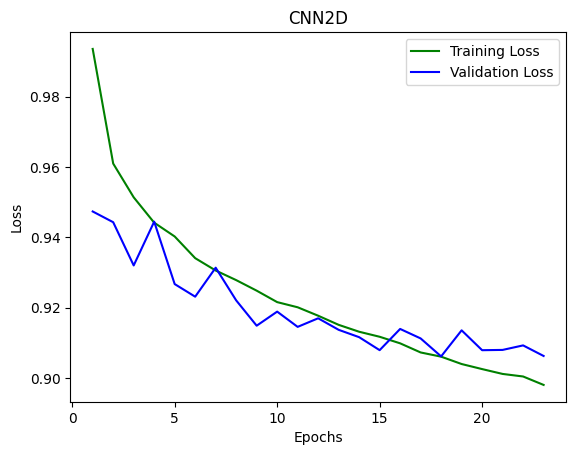

In [27]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('CNN2D')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


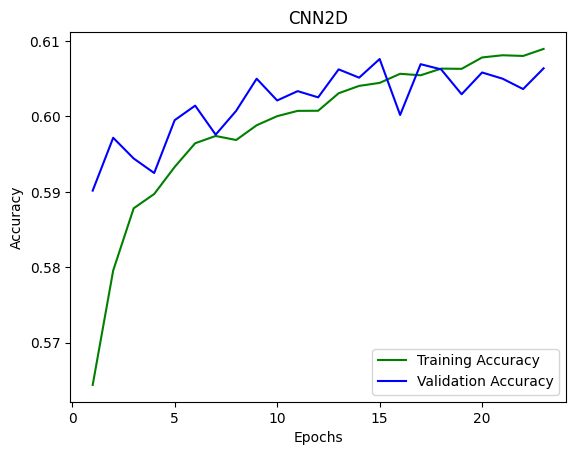

In [28]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)  # This adjusts the range to match your data length
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('CNN2D')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [29]:
y_pred = model.predict(X_te_f)

y_pred_classes = np.argmax(y_pred, axis=1)

557/557 [==============================] - 2s 4ms/step


In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nTesting Accuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred_classes)*100))

print('Precision: {:.2f}'.format(precision_score(y_test, y_pred_classes, average='weighted')*100))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred_classes, average='weighted')*100))
print('F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred_classes, average='weighted')*100))
print('F1-score-m: {:.2f}\n'.format(f1_score(y_test, y_pred_classes, average='macro')*100))


Testing Accuracy: 92.46

Precision: 97.17
Recall: 92.46
F1-score: 94.64

F1-score-m: 31.26



In [31]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_classes)
print(cm)

[[16381   432   317   370]
 [   50    43     5     2]
 [   87     0    13     0]
 [   73     3     4    20]]


### Binary Classification

In [32]:
n = 60

shape = (5,12,1)

model = create_custom_cnn2d(shape,2)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

X_tr_f = X_tr[selected_binary[0:n]].values.reshape(X_tr[selected_binary[0:n]].shape[0],5,12,1)

X_v_f = X_v[selected_binary[0:n]].values.reshape(X_v[selected_binary[0:n]].shape[0],5,12, 1)

X_te_f = X_test[selected_binary[0:n]].values.reshape(X_test[selected_binary[0:n]].shape[0],5,12, 1)

# X_train = np.reshape(X_train, (X_train.shape[0], 20))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 5, 12, 32)         320       
                                                                 
 layer_normalization_10 (La  (None, 5, 12, 32)         64        
 yerNormalization)                                               
                                                                 
 average_pooling2d_5 (Avera  (None, 3, 6, 32)          0         
 gePooling2D)                                                    
                                                                 
 spatial_dropout2d_5 (Spati  (None, 3, 6, 32)          0         
 alDropout2D)                                                    
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 6, 64)          18496     
                                                      

In [33]:
print(X_tr_f.shape)
print(X_te_f.shape)
print(X_v_f.shape)

(65528, 5, 12, 1)
(17800, 5, 12, 1)
(7281, 5, 12, 1)


In [34]:
from keras.callbacks import EarlyStopping
print(X_tr_f.shape)
history = model.fit(X_tr_f, y_tr_bin, epochs=50, batch_size=32,
                    validation_data=(X_v_f, y_v_bin),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=5)], verbose=1)

(65528, 5, 12, 1)
Epoch 1/50
2048/2048 [==============================] - 13s 6ms/step - loss: 0.7037 - accuracy: 0.5240 - val_loss: 0.6914 - val_accuracy: 0.5347
Epoch 2/50
2048/2048 [==============================] - 11s 6ms/step - loss: 0.6928 - accuracy: 0.5364 - val_loss: 0.6917 - val_accuracy: 0.5494
Epoch 3/50
2048/2048 [==============================] - 11s 5ms/step - loss: 0.6906 - accuracy: 0.5401 - val_loss: 0.6891 - val_accuracy: 0.5491
Epoch 4/50
2048/2048 [==============================] - 11s 5ms/step - loss: 0.6898 - accuracy: 0.5465 - val_loss: 0.6905 - val_accuracy: 0.5310
Epoch 5/50
2048/2048 [==============================] - 11s 5ms/step - loss: 0.6889 - accuracy: 0.5484 - val_loss: 0.6886 - val_accuracy: 0.5495
Epoch 6/50
2048/2048 [==============================] - 12s 6ms/step - loss: 0.6889 - accuracy: 0.5484 - val_loss: 0.6897 - val_accuracy: 0.5458
Epoch 7/50
2048/2048 [==============================] - 11s 5ms/step - loss: 0.6884 - accuracy: 0.5493 - val_los

In [35]:
model.save('/content/drive/MyDrive/Colab Notebooks/FYP/Anomaly/1d_CNN/CNN2D_bin_1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


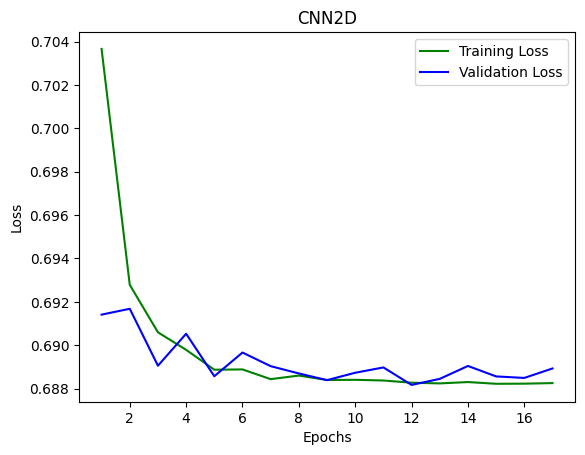

In [36]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('CNN2D')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


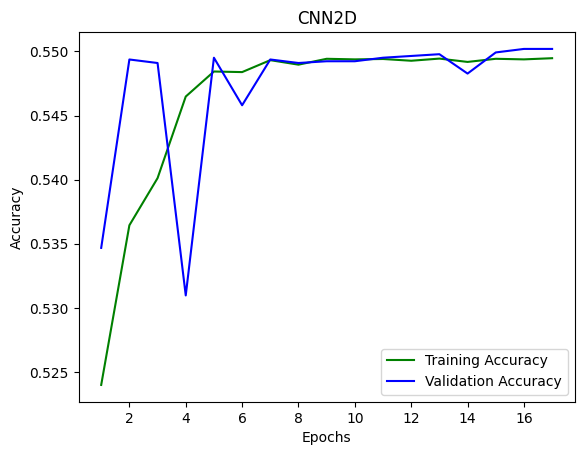

In [37]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)  # This adjusts the range to match your data length
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('CNN2D')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [38]:
y_pred = model.predict(X_te_f)

y_pred_classes = np.argmax(y_pred, axis=1)

557/557 [==============================] - 1s 2ms/step


In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nTesting Accuracy: {:.2f}\n'.format(accuracy_score(y_test_bin, y_pred_classes)*100))

print('Precision: {:.2f}'.format(precision_score(y_test_bin, y_pred_classes, average='weighted')*100))
print('Recall: {:.2f}'.format(recall_score(y_test_bin, y_pred_classes, average='weighted')*100))
print('F1-score: {:.2f}\n'.format(f1_score(y_test_bin, y_pred_classes, average='weighted')*100))
print('F1-score-m: {:.2f}\n'.format(f1_score(y_test_bin, y_pred_classes, average='macro')*100))


Testing Accuracy: 98.06

Precision: 96.69
Recall: 98.06
F1-score: 97.36

F1-score-m: 49.80



In [40]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_bin, y_pred_classes)
print(cm)

[[17453    47]
 [  299     1]]


### Anomaly Classes Classification

In [41]:
import pandas as pd

def remap_labels(df):
    # Create a copy to avoid modifying the original DataFrame
    df_copy = df.copy()
    # Remap the 'label' column
    df_copy['label'], _ = pd.factorize(df_copy['label'])
    X_train = df_copy[original_feature_names]
    y_train = df_copy['label']
    return X_train, y_train

# Apply the modified function to each dataset
X_train_123, y_train_123 = remap_labels(train[train['label'].isin([1, 2, 3])].copy())
X_test_123, y_test_123 = remap_labels(test[test['label'].isin([1, 2, 3])].copy())

X_train_01, y_train_01 = remap_labels(train[train['label'].isin([0, 1])].copy())
X_test_01, y_test_01 = remap_labels(test[test['label'].isin([0, 1])].copy())

X_train_02, y_train_02 = remap_labels(train[train['label'].isin([0, 2])].copy())
X_test_02, y_test_02 = remap_labels(test[test['label'].isin([0, 2])].copy())

X_train_03, y_train_03 = remap_labels(train[train['label'].isin([0, 3])].copy())
X_test_03, y_test_03 = remap_labels(test[test['label'].isin([0, 3])].copy())



In [42]:
X_tr_123, X_v_123, y_tr_123, y_v_123 = train_test_split(X_train_123, y_train_123, test_size=0.1, random_state=42, stratify=y_train_123)

# Split for dataset with labels 0, 1
X_tr_01, X_v_01, y_tr_01, y_v_01 = train_test_split(X_train_01, y_train_01, test_size=0.1, random_state=42, stratify=y_train_01)

# Split for dataset with labels 0, 2
X_tr_02, X_v_02, y_tr_02, y_v_02 = train_test_split(X_train_02, y_train_02, test_size=0.1, random_state=42, stratify=y_train_02)

# Split for dataset with labels 0, 3
X_tr_03, X_v_03, y_tr_03, y_v_03 = train_test_split(X_train_03, y_train_03, test_size=0.1, random_state=42, stratify=y_train_03)


Anomaly Classes Only

In [43]:
n = 60

shape = (5,12,1)

model = create_custom_cnn2d(shape,3)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

X_tr_f_123 = X_tr_123[selected_123[0:n]].values.reshape(X_tr_123[selected_0123[0:n]].shape[0],5,12,1)

X_v_f_123 = X_v_123[selected_123[0:n]].values.reshape(X_v_123[selected_0123[0:n]].shape[0],5,12,1)

X_te_f_123 = X_test_123[selected_123[0:n]].values.reshape(X_test_123[selected_0123[0:n]].shape[0],5,12,1)

# X_train = np.reshape(X_train, (X_train.shape[0], 20))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 5, 12, 32)         320       
                                                                 
 layer_normalization_12 (La  (None, 5, 12, 32)         64        
 yerNormalization)                                               
                                                                 
 average_pooling2d_6 (Avera  (None, 3, 6, 32)          0         
 gePooling2D)                                                    
                                                                 
 spatial_dropout2d_6 (Spati  (None, 3, 6, 32)          0         
 alDropout2D)                                                    
                                                                 
 conv2d_13 (Conv2D)          (None, 3, 6, 64)          18496     
                                                      

In [44]:
print(X_tr_f_123.shape)
print(X_te_f_123.shape)
print(X_v_f_123.shape)

(29527, 5, 12, 1)
(300, 5, 12, 1)
(3281, 5, 12, 1)


In [45]:
from keras.callbacks import EarlyStopping
print(X_tr_f_123.shape)
history = model.fit(X_tr_f_123, y_tr_123, epochs=50, batch_size=32,
                    validation_data=(X_v_f_123, y_v_123),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=5)], verbose=1)

(29527, 5, 12, 1)
Epoch 1/50
923/923 [==============================] - 9s 7ms/step - loss: 0.8191 - accuracy: 0.6279 - val_loss: 0.8445 - val_accuracy: 0.6187
Epoch 2/50
923/923 [==============================] - 5s 5ms/step - loss: 0.7728 - accuracy: 0.6498 - val_loss: 0.7906 - val_accuracy: 0.6474
Epoch 3/50
923/923 [==============================] - 5s 5ms/step - loss: 0.7662 - accuracy: 0.6531 - val_loss: 0.7982 - val_accuracy: 0.6413
Epoch 4/50
923/923 [==============================] - 5s 6ms/step - loss: 0.7586 - accuracy: 0.6575 - val_loss: 0.7883 - val_accuracy: 0.6468
Epoch 5/50
923/923 [==============================] - 5s 5ms/step - loss: 0.7540 - accuracy: 0.6590 - val_loss: 0.7769 - val_accuracy: 0.6513
Epoch 6/50
923/923 [==============================] - 5s 6ms/step - loss: 0.7499 - accuracy: 0.6605 - val_loss: 0.7810 - val_accuracy: 0.6519
Epoch 7/50
923/923 [==============================] - 5s 5ms/step - loss: 0.7469 - accuracy: 0.6619 - val_loss: 0.7714 - val_accur

In [46]:
model.save('/content/drive/MyDrive/Colab Notebooks/FYP/Anomaly/2d_CNN/CNN2D_anm_123_1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


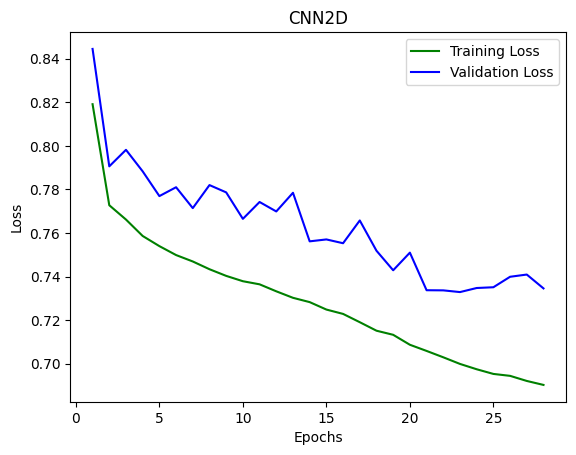

In [47]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('CNN2D')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


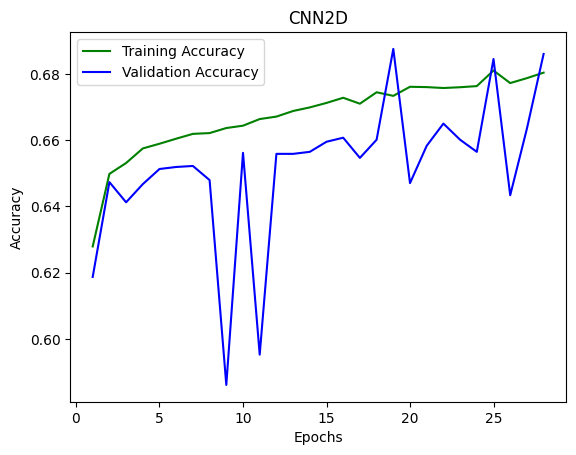

In [48]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)  # This adjusts the range to match your data length
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('CNN2D')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [49]:
y_pred = model.predict(X_te_f_123)

y_pred_classes = np.argmax(y_pred, axis=1)

10/10 [==============================] - 0s 12ms/step


In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nTesting Accuracy: {:.2f}\n'.format(accuracy_score(y_test_123, y_pred_classes)*100))

print('Precision: {:.2f}'.format(precision_score(y_test_123, y_pred_classes, average='weighted')*100))
print('Recall: {:.2f}'.format(recall_score(y_test_123, y_pred_classes, average='weighted')*100))
print('F1-score: {:.2f}\n'.format(f1_score(y_test_123, y_pred_classes, average='weighted')*100))
print('F1-score-m: {:.2f}\n'.format(f1_score(y_test_123, y_pred_classes, average='macro')*100))


Testing Accuracy: 67.67

Precision: 73.10
Recall: 67.67
F1-score: 67.33

F1-score-m: 67.33



In [51]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_123, y_pred_classes)
print(cm)

[[65 29  6]
 [ 2 90  8]
 [ 8 44 48]]


Anomaly Classes 1 Vs Normal

In [52]:
n = 60

shape = (5,12,1)

model = create_custom_cnn2d(shape,2)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

X_tr_f_01 = X_tr_01[selected_01[0:n]].values.reshape(X_tr_01[selected_01[0:n]].shape[0],5,12,1)

X_v_f_01 = X_v_01[selected_01[0:n]].values.reshape( X_v_01[selected_01[0:n]].shape[0],5,12,1)

X_te_f_01 = X_test_01[selected_01[0:n]].values.reshape(X_test_01[selected_01[0:n]].shape[0],5,12,1)

# X_train = np.reshape(X_train, (X_train.shape[0], 20))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 5, 12, 32)         320       
                                                                 
 layer_normalization_14 (La  (None, 5, 12, 32)         64        
 yerNormalization)                                               
                                                                 
 average_pooling2d_7 (Avera  (None, 3, 6, 32)          0         
 gePooling2D)                                                    
                                                                 
 spatial_dropout2d_7 (Spati  (None, 3, 6, 32)          0         
 alDropout2D)                                                    
                                                                 
 conv2d_15 (Conv2D)          (None, 3, 6, 64)          18496     
                                                      

In [53]:
print(X_tr_f_01.shape)
print(X_te_f_01.shape)
print(X_v_f_01.shape)

(43041, 5, 12, 1)
(17600, 5, 12, 1)
(4783, 5, 12, 1)


In [54]:
from keras.callbacks import EarlyStopping
print(X_tr_f_01.shape)
history = model.fit(X_tr_f_01, y_tr_01, epochs=50, batch_size=32,
                    validation_data=(X_v_f_01, y_v_01),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=5)], verbose=1)

(43041, 5, 12, 1)
Epoch 1/50
1346/1346 [==============================] - 10s 6ms/step - loss: 0.3758 - accuracy: 0.8558 - val_loss: 0.3748 - val_accuracy: 0.8601
Epoch 2/50
1346/1346 [==============================] - 7s 5ms/step - loss: 0.3615 - accuracy: 0.8616 - val_loss: 0.3514 - val_accuracy: 0.8641
Epoch 3/50
1346/1346 [==============================] - 7s 6ms/step - loss: 0.3564 - accuracy: 0.8625 - val_loss: 0.3496 - val_accuracy: 0.8633
Epoch 4/50
1346/1346 [==============================] - 7s 6ms/step - loss: 0.3537 - accuracy: 0.8640 - val_loss: 0.3431 - val_accuracy: 0.8677
Epoch 5/50
1346/1346 [==============================] - 7s 5ms/step - loss: 0.3510 - accuracy: 0.8653 - val_loss: 0.3419 - val_accuracy: 0.8654
Epoch 6/50
1346/1346 [==============================] - 8s 6ms/step - loss: 0.3497 - accuracy: 0.8653 - val_loss: 0.3430 - val_accuracy: 0.8633
Epoch 7/50
1346/1346 [==============================] - 7s 5ms/step - loss: 0.3469 - accuracy: 0.8662 - val_loss: 0.3

In [55]:
model.save('/content/drive/MyDrive/Colab Notebooks/FYP/Anomaly/2d_CNN/CNN2D_anm_01_1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


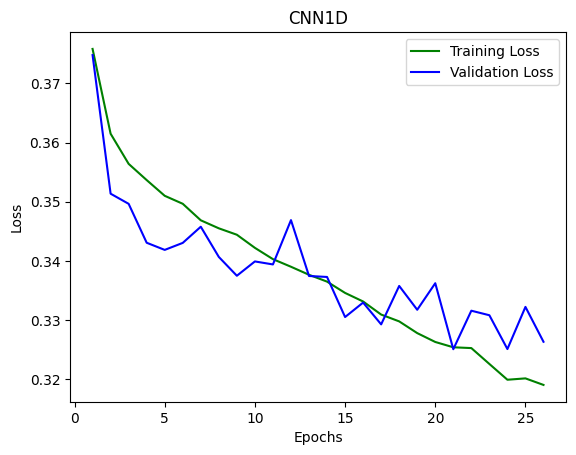

In [56]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('CNN1D')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


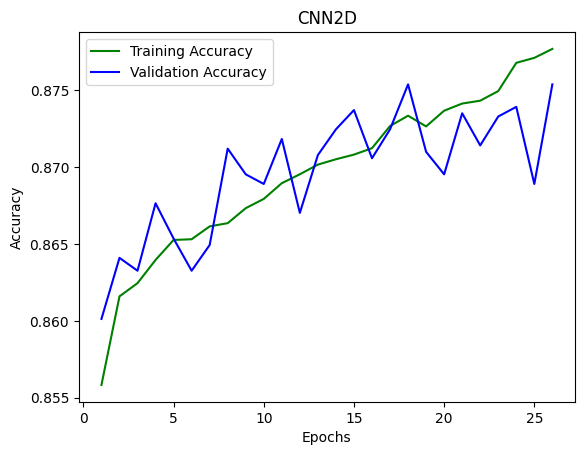

In [57]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)  # This adjusts the range to match your data length
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('CNN2D')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [58]:
y_pred = model.predict(X_te_f_01)

y_pred_classes = np.argmax(y_pred, axis=1)

550/550 [==============================] - 1s 2ms/step


In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nTesting Accuracy: {:.2f}\n'.format(accuracy_score(y_test_01, y_pred_classes)*100))

print('Precision: {:.2f}'.format(precision_score(y_test_01, y_pred_classes, average='weighted')*100))
print('Recall: {:.2f}'.format(recall_score(y_test_01, y_pred_classes, average='weighted')*100))
print('F1-score: {:.2f}\n'.format(f1_score(y_test_01, y_pred_classes, average='weighted')*100))
print('F1-score-m: {:.2f}\n'.format(f1_score(y_test_01, y_pred_classes, average='macro')*100))


Testing Accuracy: 97.93

Precision: 99.12
Recall: 97.93
F1-score: 98.48

F1-score-m: 57.54



In [60]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_01, y_pred_classes)
print(cm)

[[17201   299]
 [   65    35]]


Anomaly Classes 2 Vs Normal

In [61]:
n = 60

shape = (5,12,1)

model = create_custom_cnn2d(shape,2)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

X_tr_f_02 = X_tr_02[selected_02[0:n]].values.reshape(X_tr_02[selected_02[0:n]].shape[0],5,12,1)

X_v_f_02 = X_v_02[selected_02[0:n]].values.reshape(X_v_02[selected_02[0:n]].shape[0],5,12,1)

X_te_f_02 = X_test_02[selected_02[0:n]].values.reshape(X_test_02[selected_02[0:n]].shape[0],5,12,1)

# X_train = np.reshape(X_train, (X_train.shape[0], 20))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 5, 12, 32)         320       
                                                                 
 layer_normalization_16 (La  (None, 5, 12, 32)         64        
 yerNormalization)                                               
                                                                 
 average_pooling2d_8 (Avera  (None, 3, 6, 32)          0         
 gePooling2D)                                                    
                                                                 
 spatial_dropout2d_8 (Spati  (None, 3, 6, 32)          0         
 alDropout2D)                                                    
                                                                 
 conv2d_17 (Conv2D)          (None, 3, 6, 64)          18496     
                                                      

In [62]:
print(X_tr_f_02.shape)
print(X_te_f_02.shape)
print(X_v_f_02.shape)

(48382, 5, 12, 1)
(17600, 5, 12, 1)
(5376, 5, 12, 1)


In [63]:
from keras.callbacks import EarlyStopping
print(X_tr_f_02.shape)
history = model.fit(X_tr_f_02, y_tr_02, epochs=50, batch_size=32,
                    validation_data=(X_v_f_02, y_v_02),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=5)], verbose=1)

(48382, 5, 12, 1)
Epoch 1/50
1512/1512 [==============================] - 10s 6ms/step - loss: 0.4471 - accuracy: 0.7370 - val_loss: 0.4107 - val_accuracy: 0.7662
Epoch 2/50
1512/1512 [==============================] - 7s 5ms/step - loss: 0.4231 - accuracy: 0.7460 - val_loss: 0.4180 - val_accuracy: 0.7539
Epoch 3/50
1512/1512 [==============================] - 8s 6ms/step - loss: 0.4145 - accuracy: 0.7516 - val_loss: 0.3949 - val_accuracy: 0.7600
Epoch 4/50
1512/1512 [==============================] - 8s 5ms/step - loss: 0.4104 - accuracy: 0.7541 - val_loss: 0.4522 - val_accuracy: 0.7089
Epoch 5/50
1512/1512 [==============================] - 7s 5ms/step - loss: 0.4052 - accuracy: 0.7537 - val_loss: 0.3931 - val_accuracy: 0.7604
Epoch 6/50
1512/1512 [==============================] - 8s 5ms/step - loss: 0.3994 - accuracy: 0.7533 - val_loss: 0.3896 - val_accuracy: 0.7615
Epoch 7/50
1512/1512 [==============================] - 7s 5ms/step - loss: 0.3972 - accuracy: 0.7558 - val_loss: 0.3

In [64]:
model.save('/content/drive/MyDrive/Colab Notebooks/FYP/Anomaly/2d_CNN/CNN2D_anm_02_1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


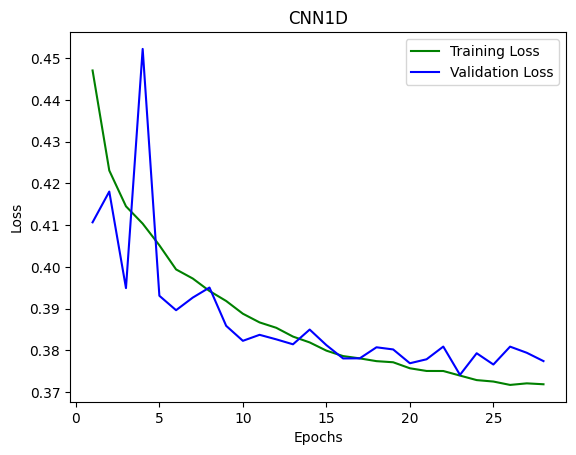

In [65]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('CNN1D')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


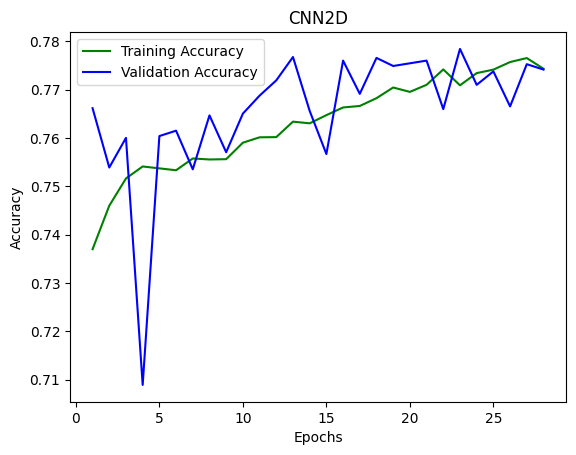

In [66]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)  # This adjusts the range to match your data length
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('CNN2D')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [67]:
y_pred = model.predict(X_te_f_02)

y_pred_classes = np.argmax(y_pred, axis=1)

550/550 [==============================] - 1s 2ms/step


In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nTesting Accuracy: {:.2f}\n'.format(accuracy_score(y_test_02, y_pred_classes)*100))

print('Precision: {:.2f}'.format(precision_score(y_test_02, y_pred_classes, average='weighted')*100))
print('Recall: {:.2f}'.format(recall_score(y_test_02, y_pred_classes, average='weighted')*100))
print('F1-score: {:.2f}\n'.format(f1_score(y_test_02, y_pred_classes, average='weighted')*100))
print('F1-score-m: {:.2f}\n'.format(f1_score(y_test_02, y_pred_classes, average='macro')*100))


Testing Accuracy: 94.34

Precision: 98.98
Recall: 94.34
F1-score: 96.55

F1-score-m: 50.65



In [69]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_02, y_pred_classes)
print(cm)

[[16581   919]
 [   78    22]]


Anomaly Classes 3 Vs Normal

In [70]:
n = 60

shape = (5,12,1)

model = create_custom_cnn2d(shape,2)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

X_tr_f_03 = X_tr_03[selected_03[0:n]].values.reshape(X_tr_03[selected_03[0:n]].shape[0],5,12,1)

X_v_f_03 = X_v_03[selected_03[0:n]].values.reshape(X_v_03[selected_03[0:n]].shape[0],5,12,1)

X_te_f_03 = X_test_03[selected_03[0:n]].values.reshape(X_test_03[selected_03[0:n]].shape[0],5,12,1)

# X_train = np.reshape(X_train, (X_train.shape[0], 20))

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 5, 12, 32)         320       
                                                                 
 layer_normalization_18 (La  (None, 5, 12, 32)         64        
 yerNormalization)                                               
                                                                 
 average_pooling2d_9 (Avera  (None, 3, 6, 32)          0         
 gePooling2D)                                                    
                                                                 
 spatial_dropout2d_9 (Spati  (None, 3, 6, 32)          0         
 alDropout2D)                                                    
                                                                 
 conv2d_19 (Conv2D)          (None, 3, 6, 64)          18496     
                                                      

In [71]:
print(X_tr_f_03.shape)
print(X_te_f_03.shape)
print(X_v_f_03.shape)

(46106, 5, 12, 1)
(17600, 5, 12, 1)
(5123, 5, 12, 1)


In [72]:
from keras.callbacks import EarlyStopping
print(X_tr_f_03.shape)
history = model.fit(X_tr_f_03, y_tr_03, epochs=50, batch_size=32,
                    validation_data=(X_v_f_03, y_v_03),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=5)], verbose=1)

(46106, 5, 12, 1)
Epoch 1/50
1441/1441 [==============================] - 11s 6ms/step - loss: 0.4523 - accuracy: 0.7923 - val_loss: 0.4265 - val_accuracy: 0.8079
Epoch 2/50
1441/1441 [==============================] - 7s 5ms/step - loss: 0.4341 - accuracy: 0.7991 - val_loss: 0.4616 - val_accuracy: 0.8038
Epoch 3/50
1441/1441 [==============================] - 8s 6ms/step - loss: 0.4234 - accuracy: 0.8007 - val_loss: 0.3993 - val_accuracy: 0.8130
Epoch 4/50
1441/1441 [==============================] - 8s 6ms/step - loss: 0.4136 - accuracy: 0.8023 - val_loss: 0.3980 - val_accuracy: 0.8062
Epoch 5/50
1441/1441 [==============================] - 8s 5ms/step - loss: 0.4064 - accuracy: 0.8033 - val_loss: 0.3905 - val_accuracy: 0.8103
Epoch 6/50
1441/1441 [==============================] - 8s 6ms/step - loss: 0.3993 - accuracy: 0.8033 - val_loss: 0.3970 - val_accuracy: 0.7855
Epoch 7/50
1441/1441 [==============================] - 7s 5ms/step - loss: 0.3947 - accuracy: 0.8029 - val_loss: 0.3

In [73]:
model.save('/content/drive/MyDrive/Colab Notebooks/FYP/Anomaly/2d_CNN/CNN2D_anm_03_1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


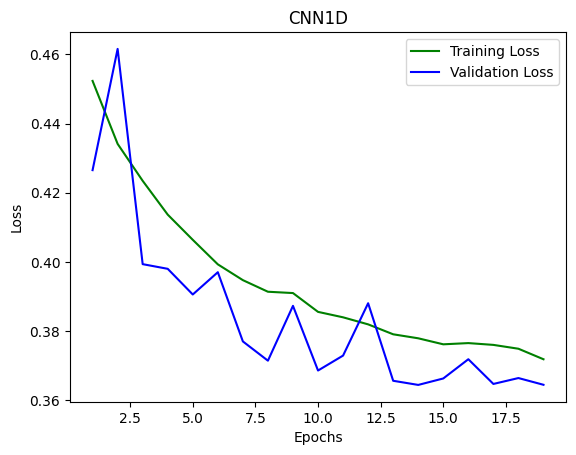

In [74]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('CNN1D')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


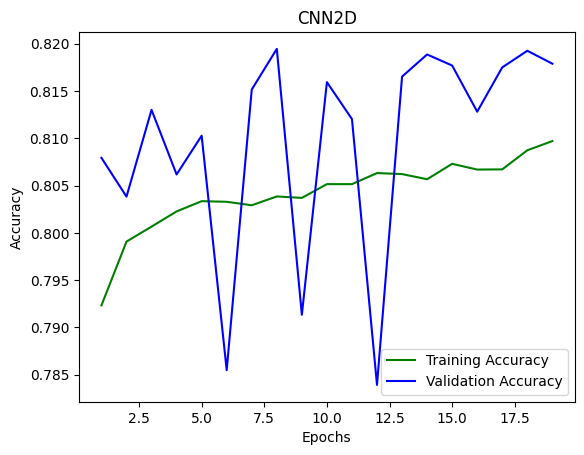

In [75]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)  # This adjusts the range to match your data length
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('CNN2D')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [76]:
y_pred = model.predict(X_te_f_03)

y_pred_classes = np.argmax(y_pred, axis=1)

550/550 [==============================] - 1s 2ms/step


In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nTesting Accuracy: {:.2f}\n'.format(accuracy_score(y_test_03, y_pred_classes)*100))

print('Precision: {:.2f}'.format(precision_score(y_test_03, y_pred_classes, average='weighted')*100))
print('Recall: {:.2f}'.format(recall_score(y_test_03, y_pred_classes, average='weighted')*100))
print('F1-score: {:.2f}\n'.format(f1_score(y_test_03, y_pred_classes, average='weighted')*100))
print('F1-score-m: {:.2f}\n'.format(f1_score(y_test_03, y_pred_classes, average='macro')*100))


Testing Accuracy: 96.55

Precision: 99.01
Recall: 96.55
F1-score: 97.72

F1-score-m: 52.78



In [78]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_03, y_pred_classes)
print(cm)

[[16968   532]
 [   76    24]]
